Let's go ahead and setup our usual libraries:

In [0]:
import pandas as pd
import plotnine as p9

And the connection to Google Drive to get the course data:

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Tidy data

Read some of the early Connecticut daily coronavirus case report data:

In [0]:
coronavirus = pd.read_csv('/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/ct-coronavirus-counts.csv')

Preview the data by checking the `.head()`:

In [4]:
coronavirus.head()

,Date,New Haven,Hamden,West Haven,Fairfield,Stamford,Danbury
0,21-Mar-20,6,0,6,4,19,4
1,22-Mar-20,7,1,6,7,25,8
2,23-Mar-20,8,1,6,8,30,15
3,24-Mar-20,22,4,11,9,34,29
4,25-Mar-20,29,6,12,13,48,63


**IS THIS TIDY DATA? WHY OR WHY NOT?**

The data here is based on the total counts as of the state's daily data releases. Changes in the number of reported cases do not necessarily correspond to the date people got sick or the date they were tested.

Use `pd.to_datetime` to set the `Date` column to date objects.

In [0]:
coronavirus['Date'] = pd.to_datetime(coronavirus['Date'])

In [6]:
coronavirus.head()

,Date,New Haven,Hamden,West Haven,Fairfield,Stamford,Danbury
0,2020-03-21,6,0,6,4,19,4
1,2020-03-22,7,1,6,7,25,8
2,2020-03-23,8,1,6,8,30,15
3,2020-03-24,22,4,11,9,34,29
4,2020-03-25,29,6,12,13,48,63


Plot the number of cases in New Haven over time. Hint: you can rotate the x-axis labels by adding e.g. `p9.theme(axis_text_x=p9.element_text(angle=20))`.


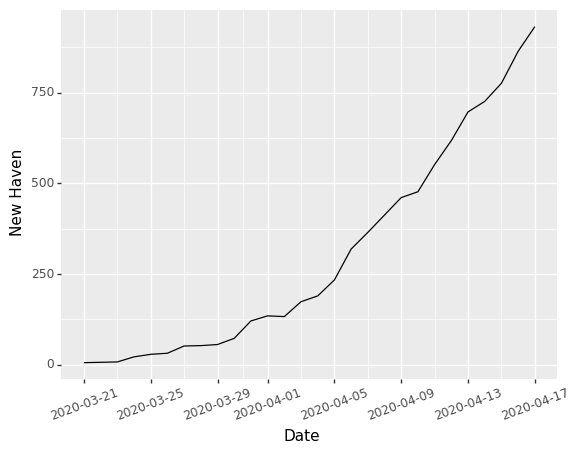

<ggplot: (-9223363287042412775)>

In [7]:
p9.ggplot(coronavirus, p9.aes(x='Date', y='New Haven')) + p9.geom_line() + p9.theme(axis_text_x=p9.element_text(angle=20))

Switch to a semi-log-y graph by adding a scale transformation of `log10` to the y-axis; i.e. add `p9.scale_y_continuous(trans='log10')`

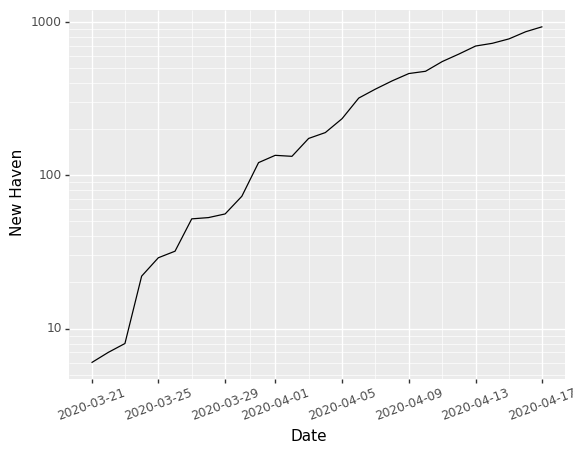

<ggplot: (-9223363287042410422)>

In [8]:
p9.ggplot(coronavirus, p9.aes(x='Date', y='New Haven')) + p9.geom_line() + p9.theme(axis_text_x=p9.element_text(angle=20)) + p9.scale_y_continuous(trans='log10')

The curve appears to be close to a straight line between April 5, 2020 and April 17, 2020. **What would a true straight line mean?**

**How hard would it be to add curves for all the other cities in our dataset? What makes it hard?**

Use `pd.melt` to turn the dataset into tidy data with three columns: `Date`, `City`, `Cases`. Verify that you did what you think you did.


In [9]:
tidy_coronavirus = pd.melt(
    coronavirus,
    id_vars=['Date'],
    value_vars=['New Haven', 'West Haven', 'Hamden', 'Fairfield', 'Stamford', 'Danbury'],
    var_name='City',
    value_name='Cases')

tidy_coronavirus

,Date,City,Cases
0,2020-03-21,New Haven,6
1,2020-03-22,New Haven,7
2,2020-03-23,New Haven,8
3,2020-03-24,New Haven,22
4,2020-03-25,New Haven,29
...,...,...,...
163,2020-04-13,Danbury,726
164,2020-04-14,Danbury,740
165,2020-04-15,Danbury,754
166,2020-04-16,Danbury,776


Now using this tidy version of the dataset, plot all the cities on the same graph (with a semi-log-y axis). You can do this in a single line not much longer than the line for plotting just New Haven.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


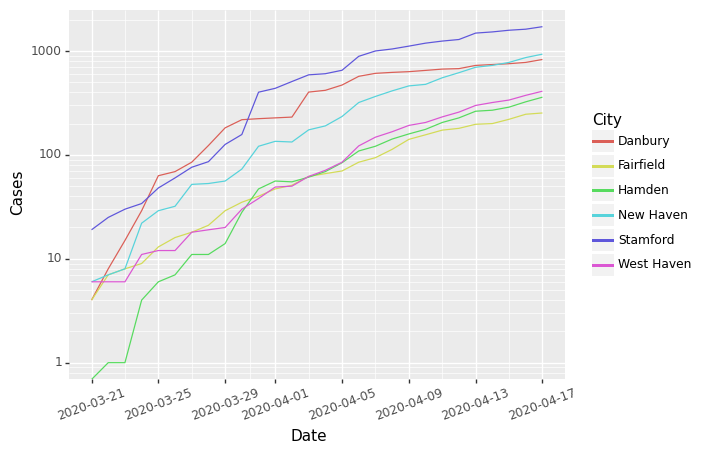

<ggplot: (8749812342648)>

In [10]:
p9.ggplot(tidy_coronavirus, p9.aes(x='Date', y='Cases', color='City')) + p9.geom_line() + p9.theme(axis_text_x=p9.element_text(angle=20)) + p9.scale_y_continuous(trans='log10')

Finally, add markers in addition to the lines to highlight the actual data points.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


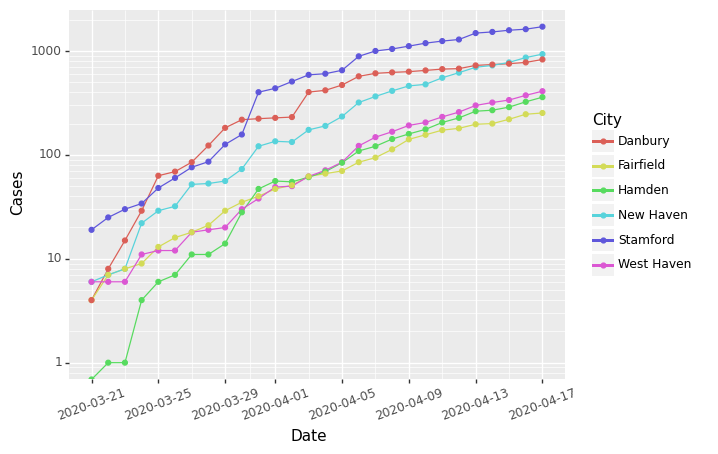

<ggplot: (-9223363287044090059)>

In [11]:
p9.ggplot(tidy_coronavirus, p9.aes(x='Date', y='Cases', color='City')) + p9.geom_line() + p9.geom_point() + p9.theme(axis_text_x=p9.element_text(angle=20)) + p9.scale_y_continuous(trans='log10')

### Missing data

Let's load the "Pima Indians Diabetes Database" dataset from the web; this data comes from the National Institute of Diabetes and Digestive and Kidney Diseases circa 1990 and consists solely of women over age 21:

In [0]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv')

Examine the dataset.

In [13]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Verify that there are no columns that contain null values.

In [14]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In some but not all columns in this particular dataset, values of 0 indicate missing data. (Note: insulin measurements here are serum insulin levels and should never be 0.) Replace the zero values with `pd.NA` to indicate that the data is missing.

In [0]:
diabetes = diabetes.replace({
    'Glucose': {0: pd.NA},
    'BloodPressure': {0: pd.NA},
    'SkinThickness': {0: pd.NA},
    'Insulin': {0: pd.NA},
    'BMI': {0: pd.NA},
    'DiabetesPedigreeFunction': {0: pd.NA},
    'Age': {0: pd.NA}
})

How many missing values were found in each column?

In [16]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

What is the mean `Age`? How does the mean `Age` for participants with a `SkinThickness` (Triceps skin fold thickness in mm) value compare to those without a `SkinThickness` value?


In [17]:
diabetes['Age'].mean()

33.240885416666664

In [18]:
diabetes[diabetes['SkinThickness'].notnull()]['Age'].mean()

31.55822550831793

In [19]:
diabetes[diabetes['SkinThickness'].isnull()]['Age'].mean()

37.25110132158591

Make a violin plot comparing the distribution of ages for people who do and do not have `SkinThickness` measurements. To make this easier, it may help to add a `hasThickness` column.

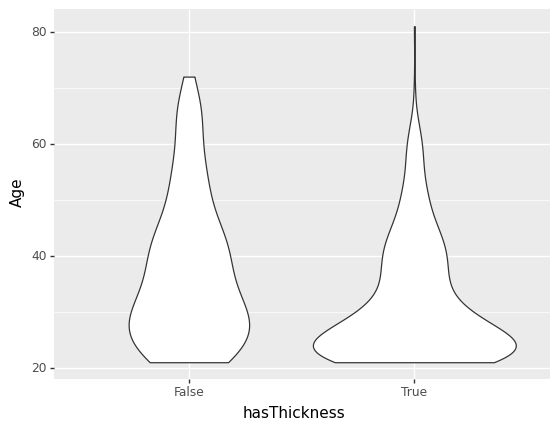

<ggplot: (8749806405787)>

In [20]:
diabetes['hasThickness'] = diabetes['SkinThickness'].notnull()
p9.ggplot(diabetes, p9.aes(y='Age', x='hasThickness')) + p9.geom_violin()

What fraction of people under age 25 have `SkinThickness` measurements? What about people over age 50?

In [21]:
population = diabetes[diabetes['Age'] < 25]
(population['SkinThickness'].notnull().sum()) / len(population)

0.8356164383561644

In [22]:
population = diabetes[diabetes['Age'] > 50]
(population['SkinThickness'].notnull().sum()) / len(population)

0.5061728395061729

Without attempting any further statistical tests, do you think the the missing values of `Skinthickness` are MAR, MCAR, or MNAR?